# Feature Engineering Intro I
<hr style="border:2px solid black">

## Introduction

### Feature engineering: what & why?

- "art" of formulating useful features from existing data 
- transforms data to better relate to the underlying target variable
- improves the performance of an ML model
- follows naturally from domain knowledge
- helps incorporate non-numeric features into an ML model

### Feature engineering techniques

 |       technique      |                                        usefulness                                |
 |:--------------------:|:--------------------------------------------------------------------------------:|
 |     `Imputation`     |                    fills out missing values in data                    |
 |   `Discretization`   |                groups a feature in some logical fashion into bins                |
 |`Categorical Encoding`|encodes categorical features into numerical values|
 |  `Feature Splitting` |splits a feature into parts|
 |   `Feature Scaling`  |handles the sensitivity of ML algorithms to the scale of input values| 
 |`Feature Expansion`|derives new features from existing ones|
 | `Log Transformation` |deals with ill-behaved (skewed of heteroscedastic) data       |
 |   `Outlier Handling` |takes care of unusually high/low values in the dataset|
 | `RBF Transformation` |uses a continuous distribution to encode ordinal features|

### Feature engineering best practices

#### 1. Split dataset into train and test sub-samples as early as we possible.

but, this is flexible — e.g. you can drop NaNs from the entire dataset before filling.
still, in interest of good machine learning habits, even then, better to do this after splitting.
#### 2. Feature engineer test data the same way as train data.

otherwise the performance of our model will suffer, if it runs at all.
writing a function is a nice way to do this.

#### 3. Feature Engineering includes any pre-processing techniques, such as:

- dropping missing values
- converting strings / non-numeric values into numeric values
- combining features

<hr style="border:2px solid black">

## Example: Penguin Data

#### load packages

In [17]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

#### load data

In [2]:
df = pd.read_csv('../data/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


#### quick exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      339 non-null    float64
 4   flipper_length_mm  340 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.8+ KB


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,339.000000,340.000000,342.000000
mean,43.921930,17.132448,200.938235,4201.754386
std,5.459584,1.972956,14.024179,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.550000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.600000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### features and target

In [5]:
numerical_features = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm'
]

categorical_features = [
    'species',
    'island',
    'sex'
]

features = numerical_features + categorical_features

target_variable = 'body_mass_g'

#### feature-target separation

In [6]:
# feature matrix and target column
X,y = df[features],df[target_variable]

#### train-test split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((256, 6), (86, 6))

### Exploratory Data Analysis

**check missing values**

In [8]:
X_train.isna().sum()

bill_length_mm       0
bill_depth_mm        2
flipper_length_mm    2
species              0
island               0
sex                  6
dtype: int64

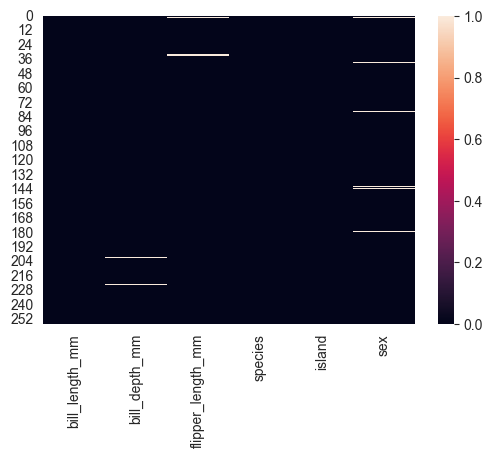

In [9]:
# check missing values graphically
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(X_train.reset_index(drop=True).isna());

#### issues with the data

- missing values 
- categorical features with non-numeric values
- metric features with varying magnitudes

<hr style="border:2px solid black">

## 1. Imputation

#### What can we do with missing values?

---
- Drop:
    + rows with missing values
    + columns with a lot of missing values
---
- Fill with a value:
    + mean/median of a column
    + interpolate / back fill / forward fill
    + mean/median of a group
---

- With pandas: 
    - `df.isna()`: checks for NaNs, then do a sum or a heatmap
    - `df.dropna()`: drop NaNs
    - `df.fillna()`: fill NaNs
One would to use `inplace=True` in these examples.

---

#### 1.1 [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [10]:
from sklearn.impute import SimpleImputer

**sex column imputation**

In [11]:
imputer = SimpleImputer(strategy='most_frequent')
X_train['sex'].value_counts()

sex
Female    127
Male      123
Name: count, dtype: int64

In [12]:
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,sex
237,46.2,14.5,209.0,Gentoo,Biscoe,Female
116,37.3,20.5,199.0,Adelie,Torgersen,Male
113,39.6,20.7,191.0,Adelie,Biscoe,Female
42,44.1,19.7,196.0,Adelie,Dream,Male
126,41.5,18.3,195.0,Adelie,Torgersen,Male


In [13]:
# Fit the variable imputer on the 'sex' column training data
imputer.fit(X_train[['sex']])
X_train['sex'] = imputer.transform(X_train[['sex']]).flatten()
X_train.isna().sum()
X_train['sex'].value_counts()

sex
Female    133
Male      123
Name: count, dtype: int64

---

**flipper length column imputation**

In [14]:
flipper_length_imputer = SimpleImputer(strategy='mean')
flipper_length_imputer.fit(X_train[['flipper_length_mm']])
X_train['flipper_length_mm'] = flipper_length_imputer.transform(
    X_train[['flipper_length_mm']]
).flatten()
X_train.isna().sum()

bill_length_mm       0
bill_depth_mm        2
flipper_length_mm    0
species              0
island               0
sex                  0
dtype: int64

#### 1.2 [`KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

- **see exercise notebook *3_intro_to_fe_continued***

<hr style="border:2px solid black">

### 2. Categorical Encoding

#### 2.1 [`get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

- **see exercise notebook *3_intro_to_fe_continued***

#### 2.2 [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
# This line of code initializes a OneHotEncoder from scikit-learn, used for transforming categorical data into a binary (one-hot encoded) format.
ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
# drop=None: keine katogoreien sollen gedroppt werden 
# sparse_output=False    = the encoder will return a dense array (i.e., a standard NumPy
# Handles how to deal with unknown categories (i.e., categories that were not present during training/fitting but appear during transformation, such as in new data).

In [20]:
X_train['species'].nunique()

3

In [21]:
 # is used to find the number of not categorical values 
X_train.head() 

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,sex
24,35.3,18.9,187.000000,Adelie,Biscoe,Female
323,47.3,13.8,201.141732,Gentoo,Biscoe,Female
143,37.3,16.8,192.000000,Adelie,Dream,Female
208,49.3,19.9,203.000000,Chinstrap,Dream,Male
253,49.1,14.8,220.000000,Gentoo,Biscoe,Female


In [22]:
X_train['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [23]:
  # is used to find the number of categorical values
ohe.fit(X_train[['species']]) # ohe.fit(): This step is used to fit the OneHotEncoder (ohe) on the 'species' column of the X_train DataFrame.
# This step applies the one-hot encoding transformation to the 'species' column.
t = ohe.transform(X_train[['species']])
# X_train[['species']]: Selects the 'species' column from the X_train DataFrame. 
   #The double brackets ([['species']]) are used to ensure that it’s passed as a DataFrame rather than a Series, as OneHotEncoder expects a 2D input.
#t is the one-hot encoded result. 
t.shape

(256, 3)

In [24]:
# Purpose: It generates the new feature names created during one-hot encoding, reflecting the original categorical feature and its unique values.
ohe.get_feature_names_out() 

array(['species_Adelie', 'species_Chinstrap', 'species_Gentoo'],
      dtype=object)

In [25]:
species = pd.DataFrame(t, columns= ohe.get_feature_names_out())
species.head()


,species_Adelie,species_Chinstrap,species_Gentoo
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [26]:
# introduced into the frame
X_train = pd.concat([X_train.reset_index(drop=True), species], axis=1)
X_train.drop(columns='species',inplace=True)

In [27]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,island,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,35.3,18.9,187.000000,Biscoe,Female,1.0,0.0,0.0
1,47.3,13.8,201.141732,Biscoe,Female,0.0,0.0,1.0
2,37.3,16.8,192.000000,Dream,Female,1.0,0.0,0.0
3,49.3,19.9,203.000000,Dream,Male,0.0,1.0,0.0
4,49.1,14.8,220.000000,Biscoe,Female,0.0,0.0,1.0


<hr style="border:2px solid black">

## 3. Feature Scaling

### 3.1 Standardization

- doesn't always result in the same range
- deals well with outliers
- implemented in scikit-learn by `StandardScaler()`
- center the data and scale by standard deviation: 
>$$z = \dfrac{x - \bar{x}}{\sigma_x}$$



In [28]:
def standardize(series):
    """
    returns the standardized counterpart of a series
    """
    mean_ = series.mean()
    std_ = series.std()
    return mean_, std_, (series-mean_)/std_

In [29]:
numerical_features.remove('flipper_length_mm')
numerical_features

['bill_length_mm', 'bill_depth_mm']

In [30]:
df_standard = pd.DataFrame()

for feature in numerical_features: 
    # populate parameter dictionary
    mean_, std_, t = standardize(X_train[feature])
    
    # create standadrdized numerical columns
    vars()['mean_'+feature] = mean_   # braucne wir nicht
    vars()['std_'+feature] = std_     # brauchen wir nicht
    df_standard[feature+'_scaled'] = t

In [31]:
df_standard.head()

,bill_length_mm_scaled,bill_depth_mm_scaled
0,-1.606199,0.908177
1,0.589628,-1.648216
2,-1.240227,-0.144456
3,0.955599,1.409430
4,0.919002,-1.146963


#### [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [32]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train[numerical_features])
t=std_scaler.transform(X_train[numerical_features])

In [33]:
df_scaled = pd.DataFrame(t, columns=[f+'_scaled' for f in numerical_features])
df_scaled.head()

,bill_length_mm_scaled,bill_depth_mm_scaled
0,-1.609345,0.909970
1,0.590783,-1.651471
2,-1.242657,-0.144741
3,0.957471,1.412213
4,0.920802,-1.149227


In [34]:
X_train = pd.concat([X_train, df_scaled], axis=1)
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,island,sex,species_Adelie,species_Chinstrap,species_Gentoo,bill_length_mm_scaled,bill_depth_mm_scaled
0,35.3,18.9,187.000000,Biscoe,Female,1.0,0.0,0.0,-1.609345,0.909970
1,47.3,13.8,201.141732,Biscoe,Female,0.0,0.0,1.0,0.590783,-1.651471
2,37.3,16.8,192.000000,Dream,Female,1.0,0.0,0.0,-1.242657,-0.144741
3,49.3,19.9,203.000000,Dream,Male,0.0,1.0,0.0,0.957471,1.412213
4,49.1,14.8,220.000000,Biscoe,Female,0.0,0.0,1.0,0.920802,-1.149227


### 3.2 Normalization

***see exercise notebook 3_intro_to_fe_continued***

<hr style="border:2px solid black">

## 4. Feature Expansion

### 4.1 Polynomial Terms

- Additional features obtained by an existing feature to some power
- Non-linear relationships can be modelled
- For some feature x, consider the model: 

$$
y = a_0 + a_1x + a_2x^2 +\ldots+\epsilon
$$

- Likely increase of model accuracy, but increased risk of overfitting

#### [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pf = PolynomialFeatures(
    degree = 3,
    interaction_only = False,
    include_bias = False
)

In [37]:
pf.fit(X_train[['bill_length_mm_scaled']])

PolynomialFeatures(degree=3, include_bias=False)

In [38]:
t = pf.transform(X_train[['bill_length_mm_scaled']])

In [39]:
pd.DataFrame(t, columns=[f"bill_length_power_{i+1}" for i in range(3)])

,bill_length_power_1,bill_length_power_2,bill_length_power_3
0,-1.609345,2.589991,-4.168189
1,0.590783,0.349025,0.206198
2,-1.242657,1.544196,-1.918906
3,0.957471,0.916751,0.877762
4,0.920802,0.847877,0.780727
...,...,...,...
251,1.452500,2.109756,3.064420
252,-0.820966,0.673985,-0.553318
253,-1.077647,1.161324,-1.251497
254,0.810796,0.657390,0.533009


### 4.2 Interaction Terms

- For multiple initial features, there could be *interactions* (cross-polynomial terms)
- For 2 features, $x_0$ and $x_1$ for example, a 2nd-degree polynomial may contain:

$$
1,~x_0,~x_1,~x_0^2,~x_0x_1,~x_1^2
$$

- Each of the terms get their own coefficient in a regression model
- Polynomial preprocessing function with `interaction_only = True`